# Análisis Exploratorio de Datos (EDA) visualizados con Python

https://kite.com/blog/python/data-analysis-visualization-python#detailed_explanation_of_EDA

(UTILIDADES PANDAS)

Valores considerados "faltantes" 

Como los datos vienen en muchas formas y formas, pandas pretende ser flexible con respecto al manejo de datos faltantes. Si bien NaNes el marcador de valor faltante predeterminado por razones de velocidad de cómputo y conveniencia, debemos poder detectar fácilmente este valor con datos de diferentes tipos: punto flotante, entero, booleano y objeto general. En muchos casos, sin embargo, Nonesurgirá el Python y también queremos considerar que "falta" o "no está disponible" o "NA".

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Comencemos leyendo el conjunto de datos con el que trabajaremos y descifrando sus variables. Para esta publicación de blog, analizaremos un conjunto de datos de Kaggle sobre los patrones de inventario y ventas de una empresa. Kaggle es una gran comunidad de científicos de datos que analizan datos juntos. Es un gran lugar para encontrar datos para practicar las habilidades cubiertas en esta publicación.

In [2]:
sales_data = pd.read_csv("data/SalesKaggle3.csv")
sales_data.head(10)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0,0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1,1,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1,1,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0,0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0,0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0,0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0,0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0,0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


In [3]:
sales_data.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,198917.000000,198917.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.065334,0.123137,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.247115,0.739101,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [4]:
print(sales_data.shape)

(198917, 14)


In [5]:
print(sales_data.nunique())

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64


In [6]:
print(sales_data[sales_data['File_Type'] == 'Historical']['SKU_number'].count())
print(sales_data[sales_data['File_Type'] == 'Active']['SKU_number'].count())

75996
122921


Análisis univariado y bivariado.

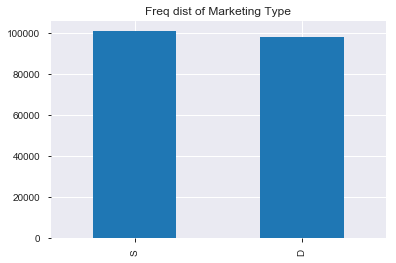

In [7]:
sales_data['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")

A continuación se muestra el código para trazar la distribución univariada de las columnas numéricas que contienen los histogramas y el PDF estimado. Usamos 'displot' la biblioteca seaborn para trazar este gráfico

In [8]:
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

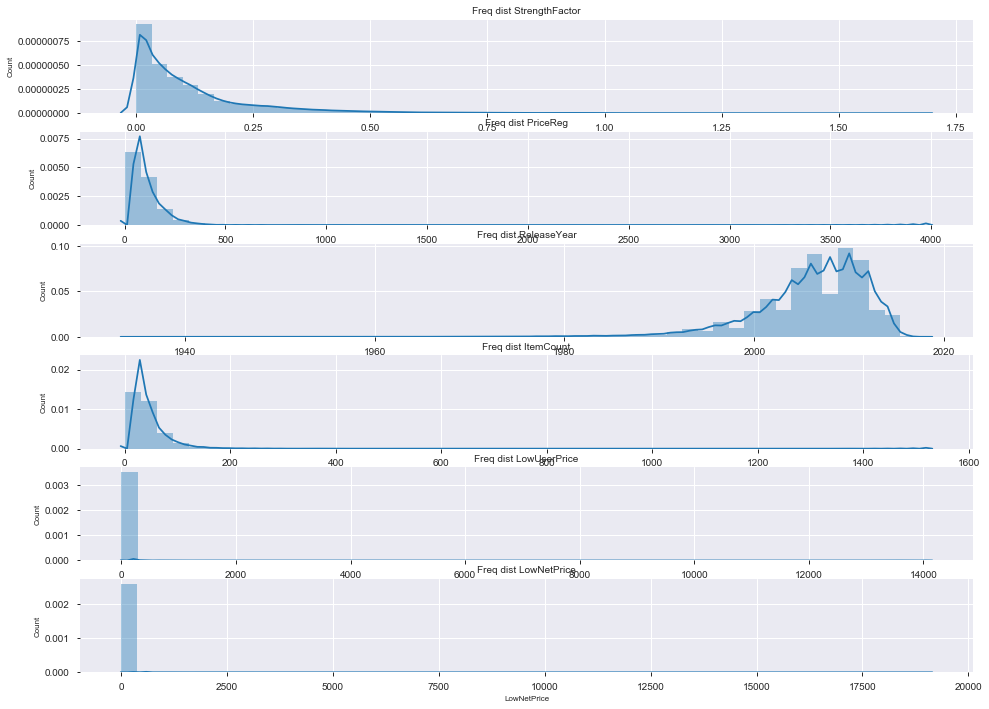

In [9]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(sales_data_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

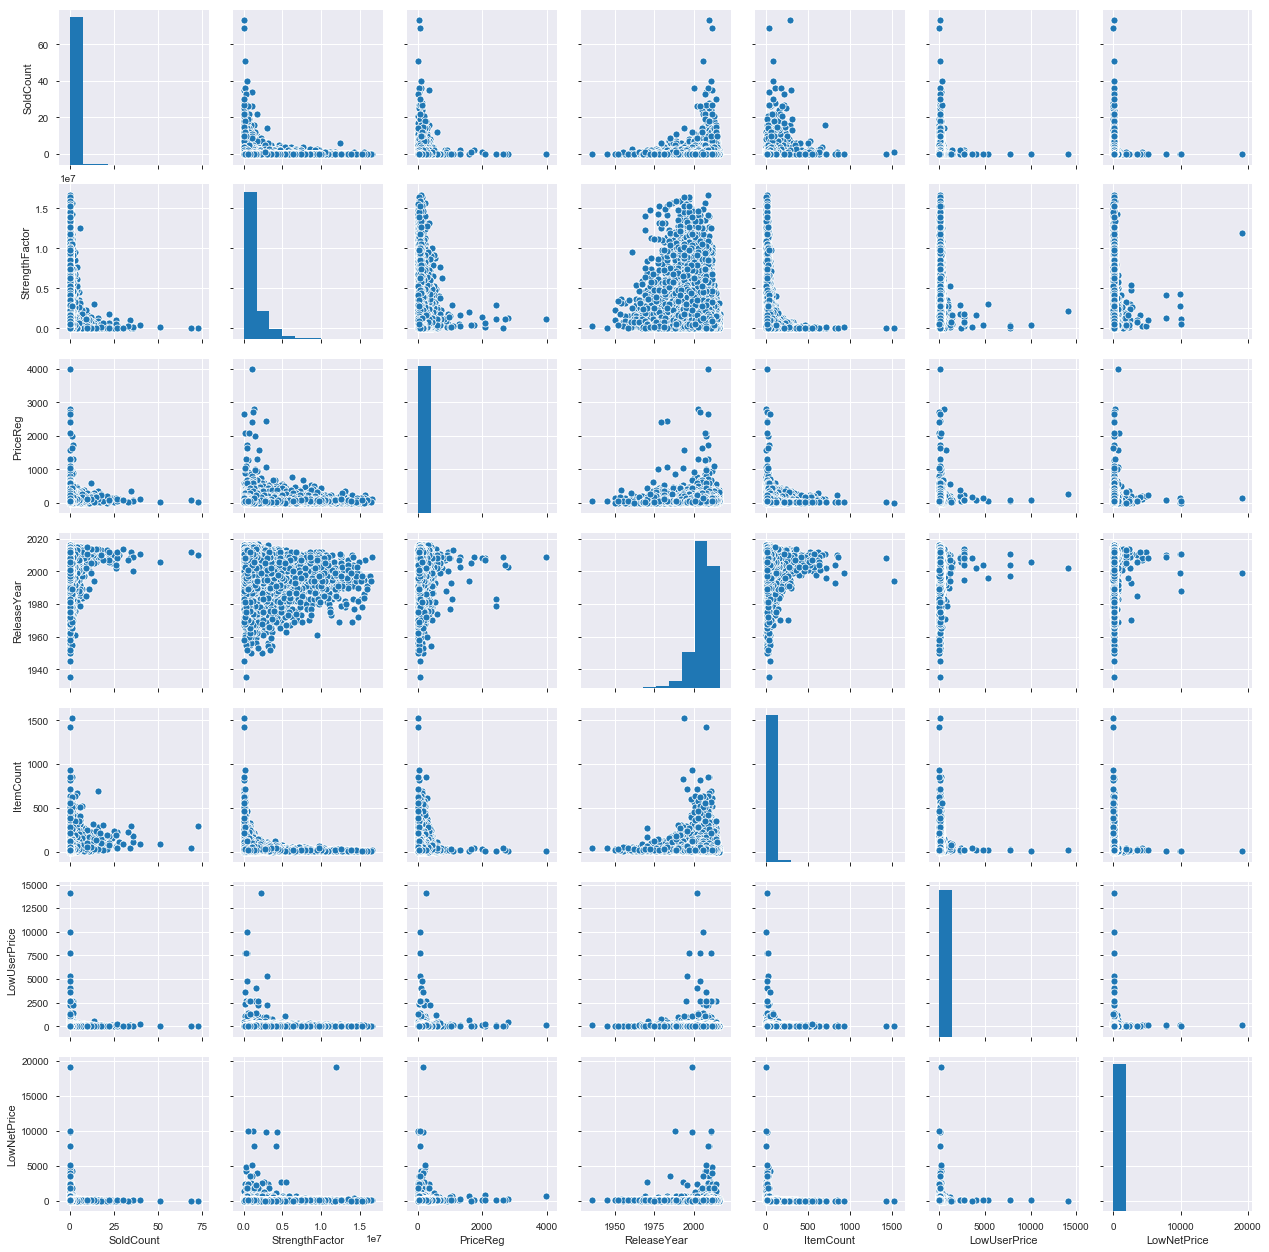

In [10]:
sales_data_hist = sales_data_hist.drop([
      'Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'
], axis=1)
sns.pairplot(sales_data_hist)

In [11]:
#sales_data.isnull().values.any()

In [12]:
#sales_data.isnull().sum()

In [13]:
#sales_data['SoldFlag'].fillna(0, inplace=True)
#sales_data['SoldCount'].fillna(0, inplace=True)

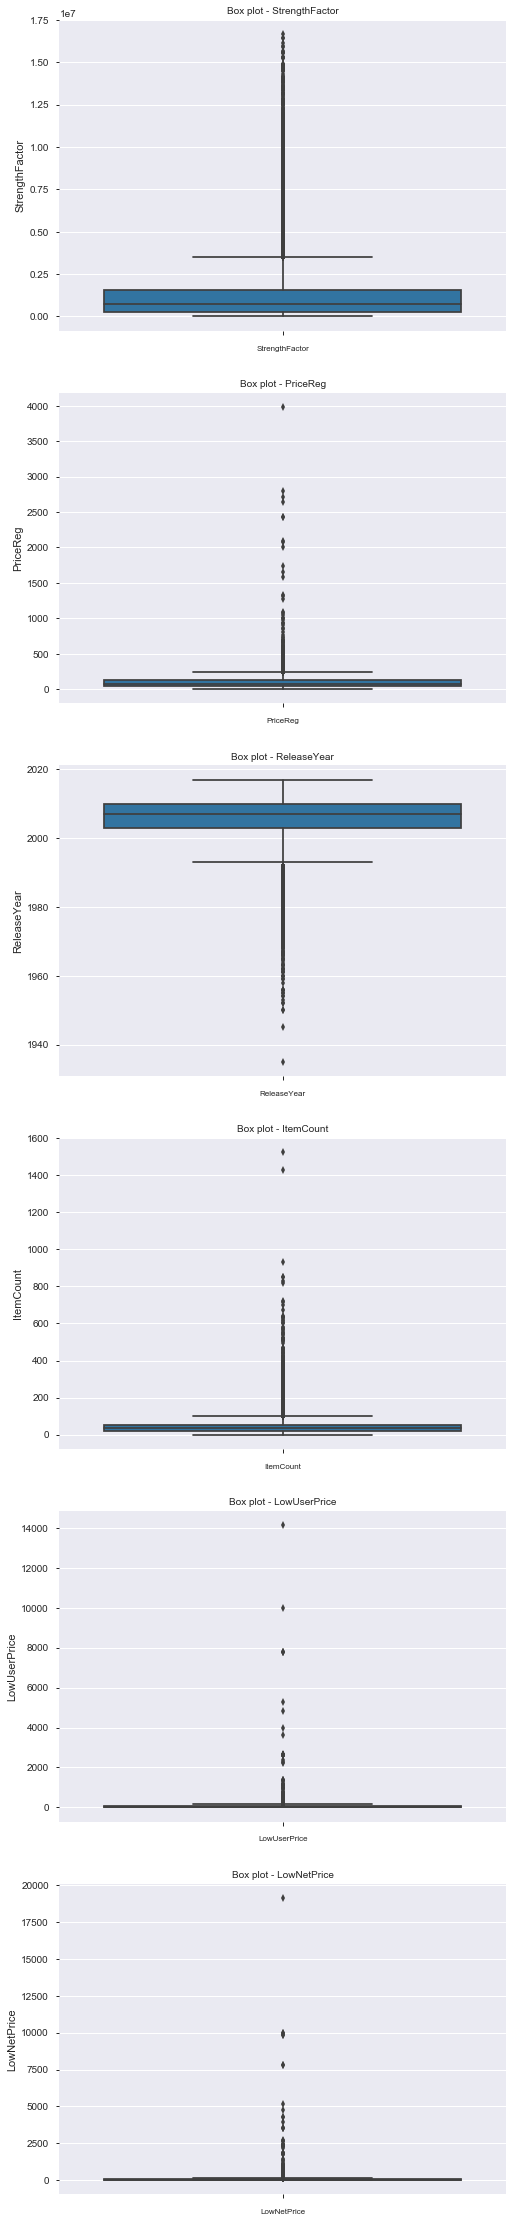

In [14]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=sales_data_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

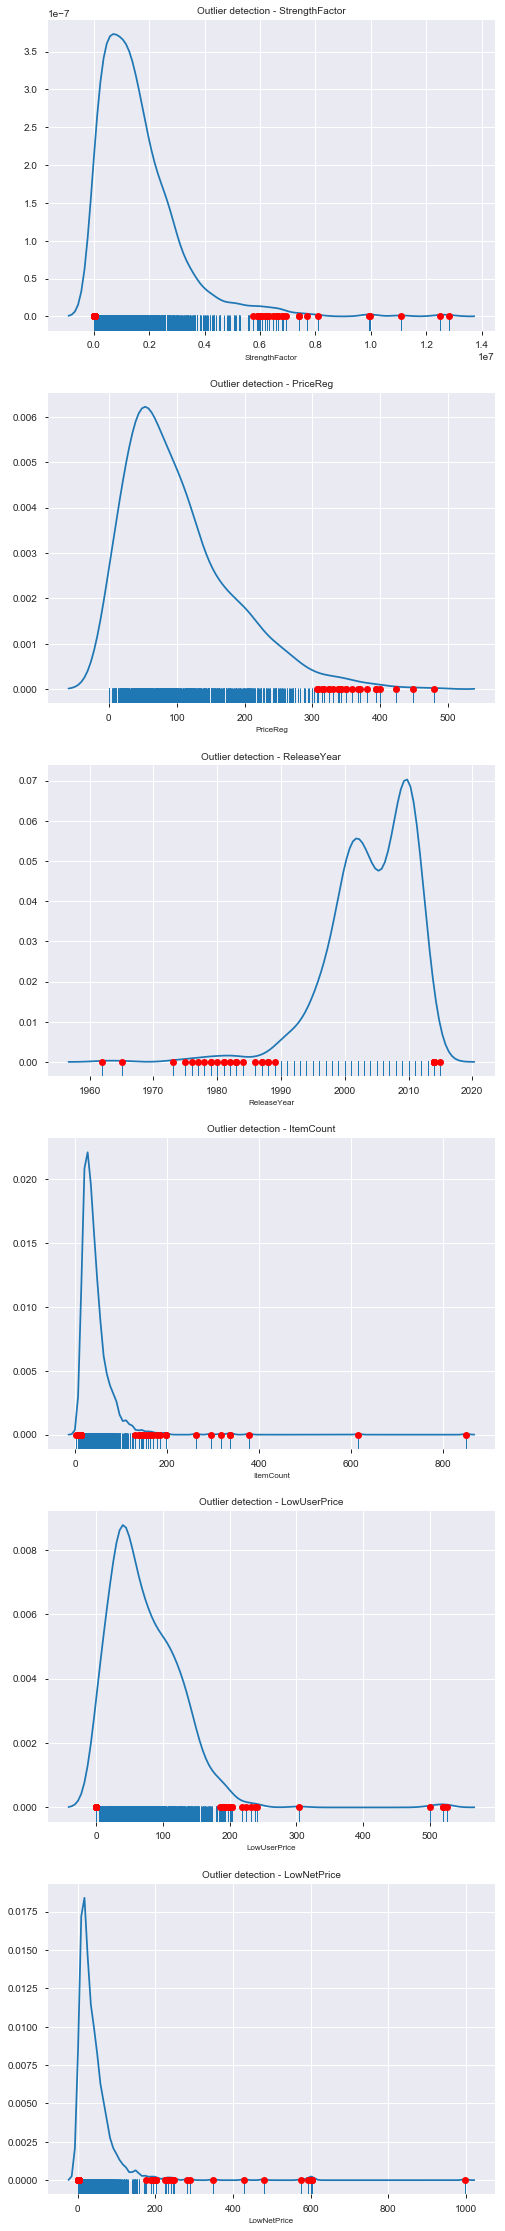

In [15]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = sales_data_hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

La matriz de correlación.

Una matriz de correlación es una tabla que muestra el valor del coeficiente de correlación (los coeficientes de correlación se usan en las estadísticas para medir qué tan fuerte es una relación entre dos variables) entre conjuntos de variables. Cada atributo del conjunto de datos se compara con los otros atributos para averiguar el coeficiente de correlación. Este análisis le permite ver qué pares tienen la correlación más alta, los pares que están altamente correlacionados representan la misma varianza del conjunto de datos, por lo que podemos analizarlos aún más para comprender qué atributo entre los pares es el más significativo para construir el modelo.

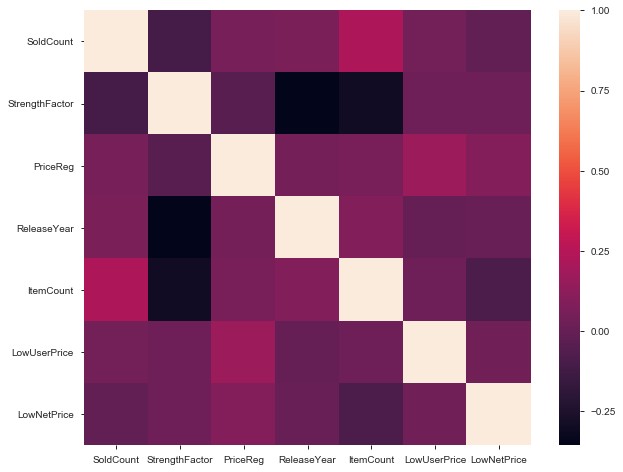

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = sales_data_hist.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [17]:
sales_data_hist = sales_data[sales_data['File_Type'] == 'Historical']
sales_data_act = sales_data[sales_data['File_Type'] == 'Active']

In [18]:
sales_data_hist

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0,0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0,0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0,0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1,1,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1,1,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0,0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0,0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0,0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0,0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0,0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


In [19]:
sales_data_act

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,0,0,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,0,0,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,0,0,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,0,0,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,0,0,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80
76001,85112,Active,862455,0,0,S,3,1,6.576754e+06,97.25,2017,0,0.00,85.95
76002,85113,Active,2238268,0,0,S,3,1,4.852005e+05,26.07,2012,32,21.97,21.87
76003,85114,Active,2348209,0,0,S,5,1,3.316372e+06,10.25,2003,16,33.00,111.46
76004,85115,Active,910476,0,0,S,7,1,2.758356e+06,125.17,2008,23,4.00,72.63
76005,85116,Active,1547664,0,0,S,2,1,1.469890e+06,48.95,2012,4,19.59,15.00


In [21]:
profile = pandas_profiling.ProfileReport(sales_data)
profile.to_file('data/tdataVentasKaggle.html')